#Experimenting with Discrete Fourier Transform (DFT)

----------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Below is our own DFT function that we will use throughout.

In [ ]:
def DFT(y):
    N = len(y)
    n = np.arange(N)
    e = np.exp( -2j * np.pi * n.reshape((N, 1)) * n / N )
    return np.dot(e, y)

The following are a couple useful plotting functions that we will use during our analysis.

In [ ]:
def plot_dft( yf, freq ):
  plt.stem( freq, abs(yf), 'r', basefmt = "-r", markerfmt = " ", use_line_collection = True )
  plt.xlabel('frequency')
  plt.ylabel('amplitude')
  plt.title('DFT')
  plt.show()

In [ ]:
def plot_dft_real_and_imaginary( yf, freq ):
  plt.stem( freq, abs(np.real(yf)), 'r', basefmt = "-r", markerfmt = " ", use_line_collection = True )
  plt.xlabel('frequency')
  plt.ylabel('amplitude')
  plt.title('DFT - Real')
  plt.show()

  plt.stem( freq, abs(np.imag(yf)), 'r', basefmt = "-r", markerfmt = " ", use_line_collection = True )
  plt.xlabel('frequency')
  plt.ylabel('amplitude')
  plt.title('DFT - Imaginary')
  plt.show()

Finally, let us initialize certain parameters and variables that will remain the same for all cases.

In [ ]:
# parameters / variables
sampling_rate = 100
t_min   = 0
t_max   = 1
freq    = 1
w       = 2 * np.pi * freq
t       = np.arange( t_min, t_max, 1.0 / sampling_rate )

----------------------------------------------------
# 1. Even Signal
y(t) = 3 cos(ωt) + 2 cos(3ωt) + cos(5ωt)

Let us first create and plot our signal.

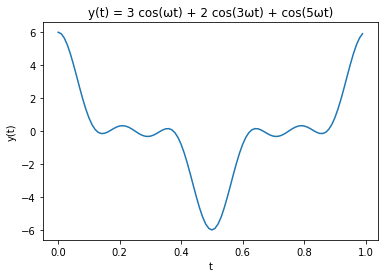

In [ ]:
# signal
y_even = 3*np.cos(w*t) + 2*np.cos(3*w*t) + np.cos(5*w*t)

# plotting
plt.plot( t, y_even )
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y(t) = 3 cos(ωt) + 2 cos(3ωt) + cos(5ωt)')
plt.show()

Now, we can apply our DFT method and see the results.

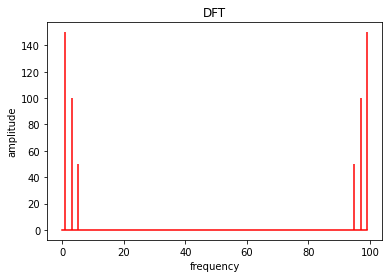

In [ ]:
# applying DFT & calculating frequency
yf_even = DFT(y_even)
L = len(yf_even)
freq_even = sampling_rate * np.arange(L) / L

# plotting
plot_dft( yf_even, freq_even )

Let us take a closer look at the components.

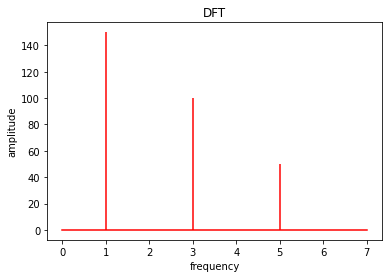

In [ ]:
plot_dft( yf_even[0:8], freq_even[0:8] )

As can be seen from these plots,


*   The components of our signal are indeed in the ratio 3:2:1. That is why the amplitudes have values 150, 100 and 50.
*   The frequencies do indeed have the expected values. We see the spikes at frequencies 1, 3 and 5.


Now let us take a look at the real and imaginary parts.

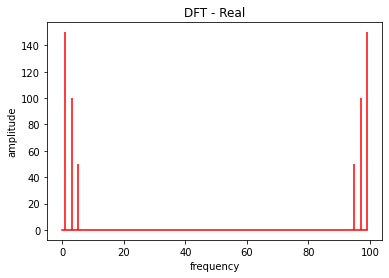

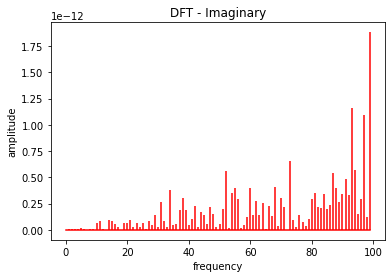

In [ ]:
plot_dft_real_and_imaginary( yf_even, freq_even )

As can be seen from these plots, our signal is essentially real.

----------------------------------------------------
# 2. Odd Signal
y(t) = sin(ωt) + 2 sin(3ωt) + 3 sin(5ωt)

Let us first create and plot our signal.

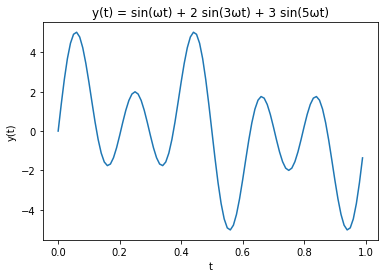

In [ ]:
# signal
y_odd = np.sin(w*t) + 2*np.sin(3*w*t) + 3*np.sin(5*w*t)

# plotting
plt.plot( t, y_odd )
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y(t) = sin(ωt) + 2 sin(3ωt) + 3 sin(5ωt)')
plt.show()

Now, we can apply our DFT method and see the results.

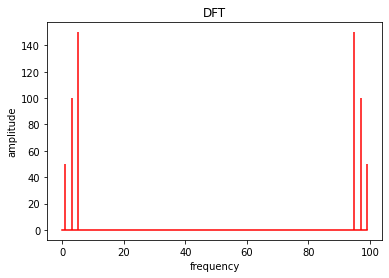

In [ ]:
# applying DFT & calculating frequency
yf_odd = DFT(y_odd)
L = len(yf_odd)
freq_odd = sampling_rate * np.arange(L) / L

# plotting
plot_dft( yf_odd, freq_odd )

Let us take a closer look at the components.

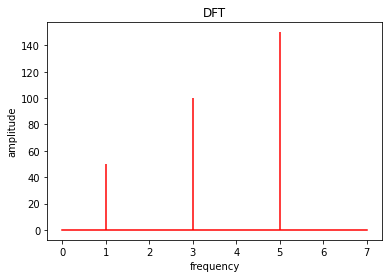

In [ ]:
plot_dft( yf_odd[0:8], freq_odd[0:8] )

As can be seen from these plots,



*   The components of our signal are indeed in the ratio 1:2:3. That is why the amplitudes have values 50, 100 and 150.
*   The frequencies do indeed have the expected values. We see the spikes at frequencies 1, 3 and 5.




Now let us take a look at the real and imaginary parts.

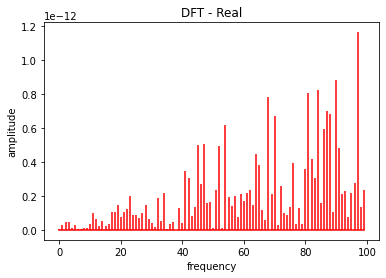

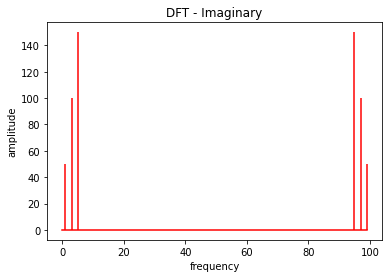

In [ ]:
plot_dft_real_and_imaginary( yf_odd, freq_odd )

As can be seen from these plots, our signal is essentially imaginary.

----------------------------------------------------
# 3. Mixed Signal
y(t) = 5 sin(ωt) + 2 cos(3ωt) + sin(5ωt)

Let us first create and plot our signal.

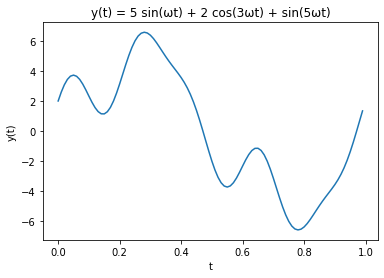

In [ ]:
# signal
y_mixed = 5*np.sin(w*t) + 2*np.cos(3*w*t) + np.sin(5*w*t)

# plotting
plt.plot( t, y_mixed )
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y(t) = 5 sin(ωt) + 2 cos(3ωt) + sin(5ωt)')
plt.show()

Now, we can apply our DFT method and see the results.

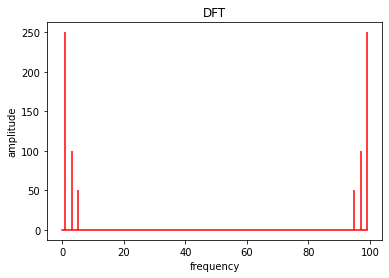

In [ ]:
# applying DFT & calculating frequency
yf_mixed = DFT(y_mixed)
L = len(yf_mixed)
freq_mixed = sampling_rate * np.arange(L) / L

# plotting
plot_dft( yf_mixed, freq_mixed )

Let us take a closer look at the components.

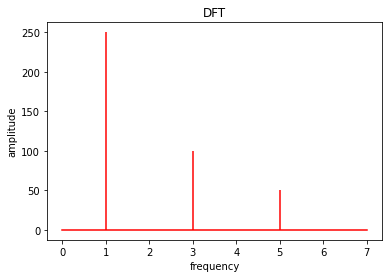

In [ ]:
plot_dft( yf_mixed[0:8], freq_mixed[0:8] )

Now let us take a look at the real and imaginary parts.

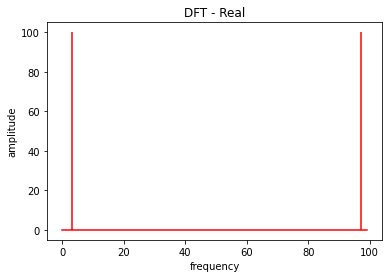

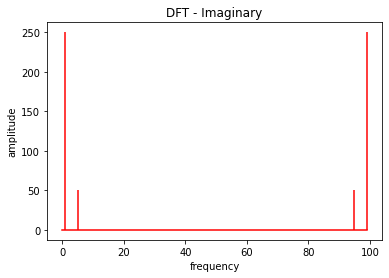

In [ ]:
plot_dft_real_and_imaginary( yf_mixed, freq_mixed )

As can be seen from these plots, our signal is essentially both real and imaginary.

----------------------------------------------------
# 4. Experiments
y(t) = 3 cos(ωt) + 2 cos(3ωt) + cos(5ωt)

Let us experiment more on the even signal.

Let us first play with the ***sampling rate.***

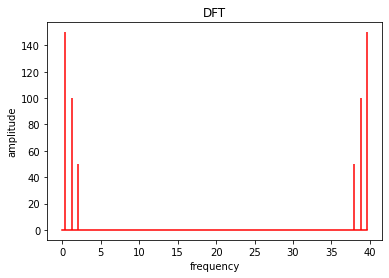

In [ ]:
sampling_rate_experiment = 40

# applying DFT & calculating frequency
yf_even = DFT(y_even)
L = len(yf_even)
freq_even = sampling_rate_experiment * np.arange(L) / L

# plotting
plot_dft( yf_even, freq_even )

When we change sampling rate, we see the limits of the frequency axis change in the DFT plot. This is because DFT's output is symmetric with respect to the half of our sampling rate, i.e. the Nyquist frequency.

----------------------------------------------------
Let us now see what happens when we play with the ***measurement period***.

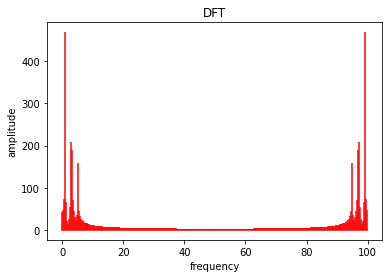

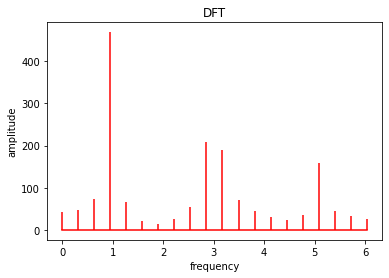

In [ ]:
# new measurement period
t_min = 0
t_max = np.pi
t_experiment = np.arange( t_min, t_max, 1.0 / sampling_rate )

# signal
y_experiment = 3*np.cos(w*t_experiment) + 2*np.cos(3*w*t_experiment) + np.cos(5*w*t_experiment)

# applying DFT & calculating frequency
yf_experiment = DFT( y_experiment )
L = len( yf_experiment )
freq_experiment = sampling_rate * np.arange(L) / L

# plotting
plot_dft( yf_experiment, freq_experiment )
plot_dft( yf_experiment[0:20], freq_experiment[0:20] )

We see that enlarging the period of measurement (in our case from 1 to π), has reduced our signal resolution in the frequency domain. Indeed, using the sampling theorem, one can claim that the frequency resolution of a signal is inversely proportional to the measurement period in the time domain.

To denote this further, let us repeat this experiment with an even bigger measurement period of 5π.

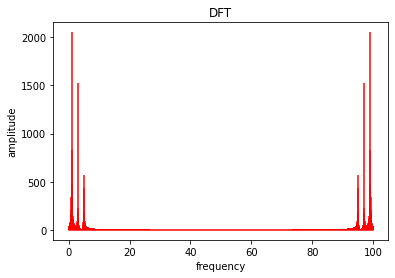

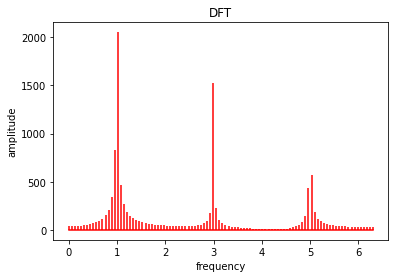

In [ ]:
# new measurement period
t_min = 0
t_max = 5*np.pi
t_experiment = np.arange( t_min, t_max, 1.0 / sampling_rate )

# signal
y_experiment = 3*np.cos(w*t_experiment) + 2*np.cos(3*w*t_experiment) + np.cos(5*w*t_experiment)

# applying DFT & calculating frequency
yf_experiment = DFT( y_experiment )
L = len( yf_experiment )
freq_experiment = sampling_rate * np.arange(L) / L

# plotting
plot_dft( yf_experiment, freq_experiment )
plot_dft( yf_experiment[0:100], freq_experiment[0:100] )

Just as we expected, the frequency resolution has suffered even more now.